# Analyzing Stops Distribution and Graph Structure.
[module] -> [analyze]

In [1]:
from constructions.var import *
from constructions.stop import *
from constructions.path import *
from network.optimize import *
from shortestPath.fixedPoints import *
from shortestPath.a_star import *
from shortestPath.dijkstra import *
from performance.a_star_benchmark import *
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import time
import random

In [2]:
graph_fixed = Fixed_Caching("vars.json", "stops.json", "paths.json")

100%|██████████| 297/297 [00:02<00:00, 115.10it/s]


Load cache [important routes] successfully.
Load cache [fixed routes] successfully.


Scattering zones of stops to identifying algorithms for fixed_routes.

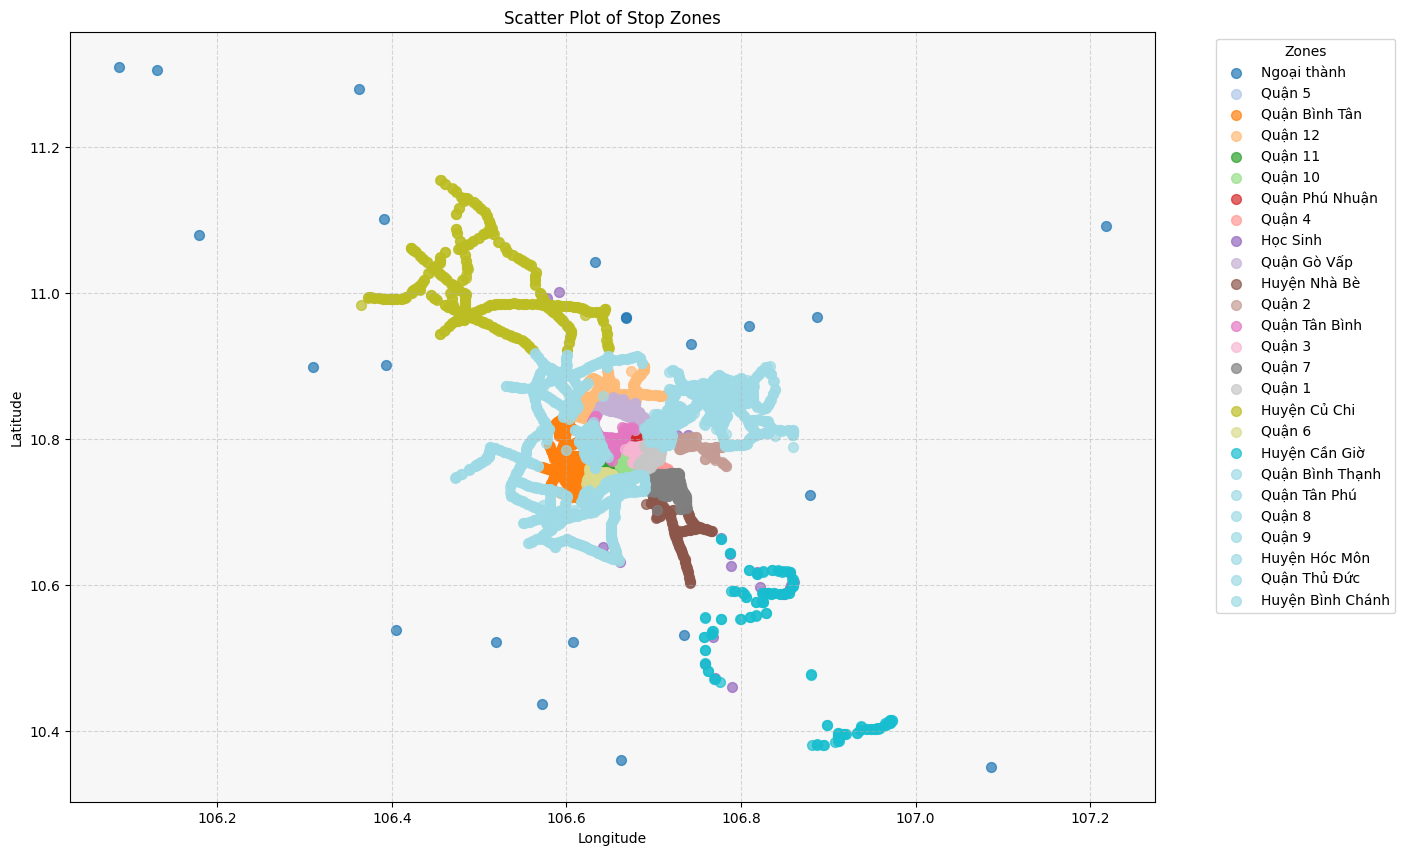

In [21]:
import json
import matplotlib.pyplot as plt

with open("input/stop_zone.json", "r") as f:
    stop_zone = json.load(f)
    
latitudes = [zone["lat"] for zone in stop_zone.values()]
longitudes = [zone["lng"] for zone in stop_zone.values()]
zones = [zone["zone"] for zone in stop_zone.values()]

unique_zones = list(set(zones))

cmap = plt.get_cmap("tab20")
colors = {zone: cmap(i) for i, zone in enumerate(unique_zones)}

plt.figure(figsize=(14, 10))
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().set_facecolor('#f7f7f7')

for zone in unique_zones:
    zone_latitudes = [lat for lat, z in zip(latitudes, zones) if z == zone]
    zone_longitudes = [lng for lng, z in zip(longitudes, zones) if z == zone]
    plt.scatter(zone_longitudes, zone_latitudes, label=zone, color=colors[zone], s=50, alpha=0.7)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Scatter Plot of Stop Zones")

plt.legend(title="Zones", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


Scattering distribution of 1000 most important stops.

In [16]:
stop_object = StopQuery("stops.json")
top_thousand = graph_fixed.loadTopImpo()

def outputAsCSV(stop_list):
    try:
        with open("input/stop_impo_info.csv", "w", newline="", encoding="utf-8") as file:
            writer = csv.writer(file)
            writer.writerow(["StopId", "Zone", "Street", "Importance", "Lng", "Lat"])
            for stop in stop_list.values():
                writer.writerow([stop["StopId"], stop["Zone"], stop["Street"], stop["Importance"], stop["Lng"], stop["Lat"]])
        print("CSV file created successfully.")
    except Exception as e:
        print(f"Error creating CSV file: {str(e)}")
            
stops_info = {}

for stop in top_thousand:
    stops_info[stop[0]] = {}
    
    stops_info[stop[0]]["StopId"] = stop[0]
    stops_info[stop[0]]["Zone"] = stop_object.searchByABC(StopId=str(stop[0]))[0].Zone
    stops_info[stop[0]]["Street"] = stop_object.searchByABC(StopId=str(stop[0]))[0].Street
    stops_info[stop[0]]["Importance"] = stop[1]
    stops_info[stop[0]]["Lng"] = stop_object.searchByABC(StopId=str(stop[0]))[0].Lng
    stops_info[stop[0]]["Lat"] = stop_object.searchByABC(StopId=str(stop[0]))[0].Lat

outputAsCSV(stops_info)


CSV file created successfully.


In [26]:
raw_data = pd.read_csv("input/stop_impo_info.csv")
raw_data.head()

,StopId,Zone,Street,Importance,Lng,Lat
0,1239,Huyện Hóc Môn,Quốc lộ 22,2593271,106.613522,10.845187
1,1115,Quận 12,Quốc lộ 22,2588447,106.613517,10.845803
2,1393,Huyện Hóc Môn,Quốc lộ 22,2573424,106.608152,10.853595
3,1152,Quận 12,Quốc lộ 22,2528083,106.607863,10.854660
4,510,Quận Tân Bình,Hoàng Văn Thụ,2227645,106.655198,10.794720


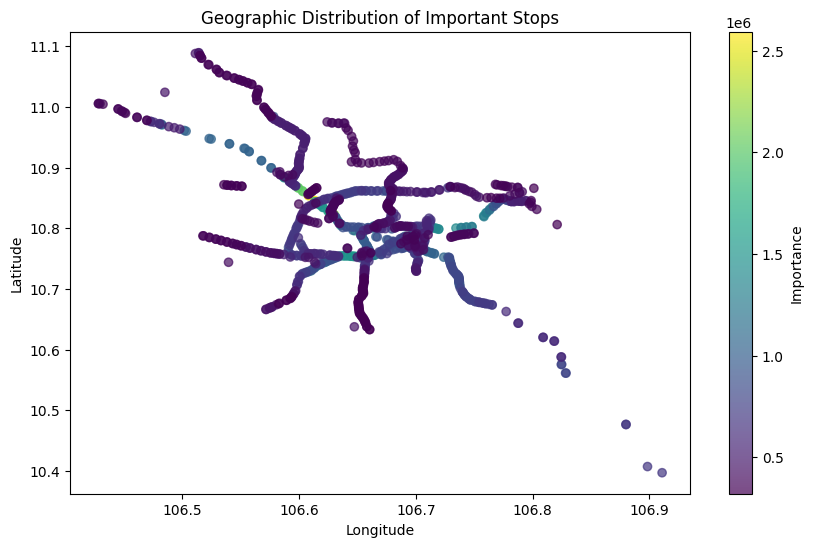

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(raw_data['Lng'], raw_data['Lat'], c=raw_data['Importance'], cmap='viridis', alpha=0.7)
plt.title('Geographic Distribution of Important Stops')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Importance')
plt.show()

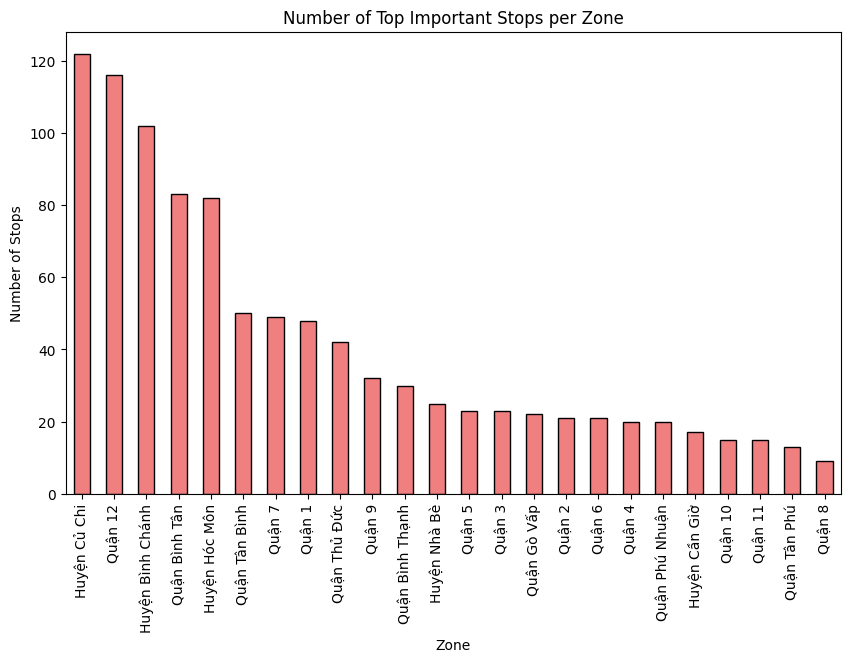

In [28]:
# Counting the number of important stops per Zone
zone_counts = raw_data['Zone'].value_counts()

# Plotting the bar chart of Number of Stops per Zone
plt.figure(figsize=(10,6))
zone_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Number of Top Important Stops per Zone')
plt.xlabel('Zone')
plt.ylabel('Number of Stops')
plt.show()

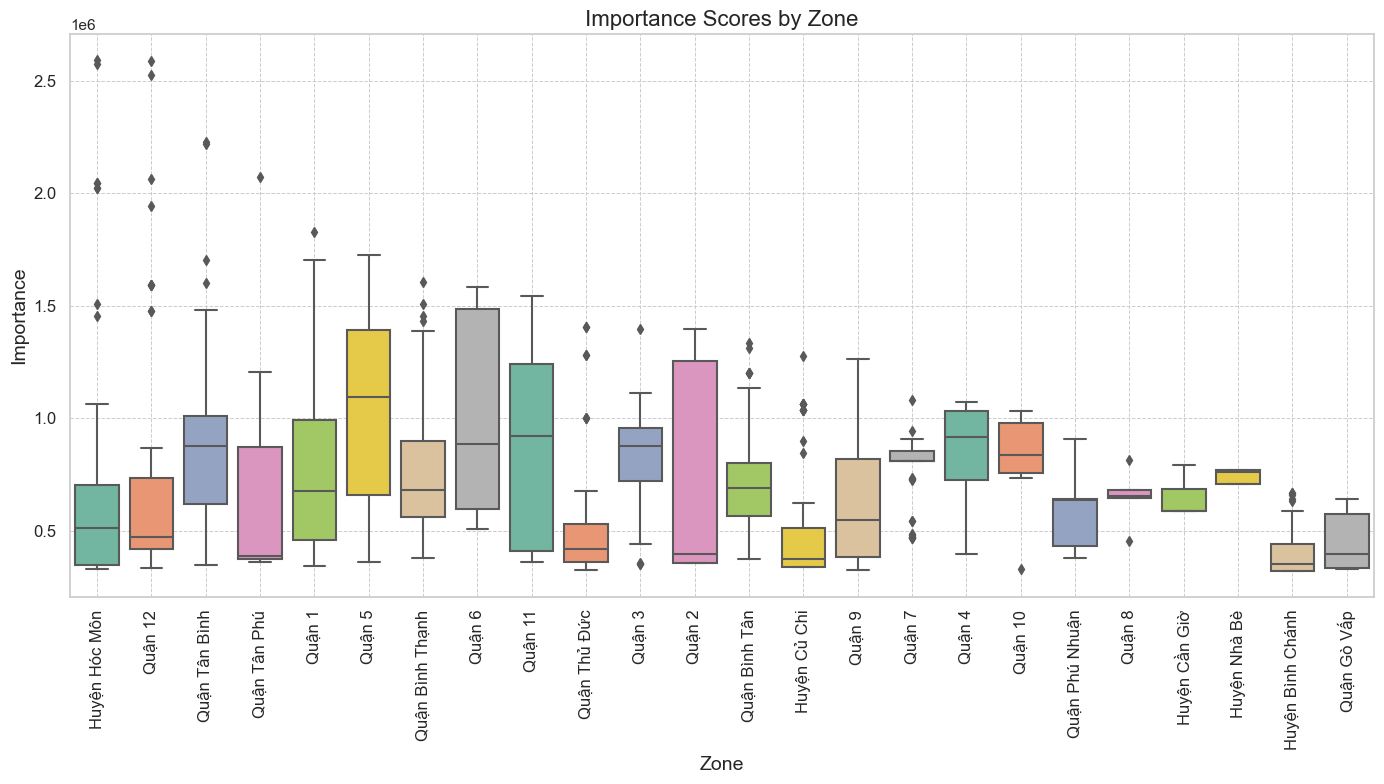

In [30]:
sns.set(style="whitegrid")

plt.figure(figsize=(14,8))
ax = sns.boxplot(x='Zone', y='Importance', data=raw_data, palette="Set2")

ax.set_title('Importance Scores by Zone', fontsize=16)
ax.set_xlabel('Zone', fontsize=14)
ax.set_ylabel('Importance', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()